## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OrdinalEncoder

In [2]:
E_data = pd.read_csv("cleaned_ecommerce_dataset.csv")

In [3]:
#printing length of the dataframe
print('Length of the E-Commerce dataset is', len(E_data))

Length of the E-Commerce dataset is 2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [4]:
#printing first five values from the dataframe
E_data.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [5]:
#printing last five values from the dataframe
E_data.tail()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
2680,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
2681,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
2682,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
2683,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5
2684,2445,101400,Great Service.,PayPal,5.0,3.0,M,Personal Finance,52,38.00,5


In [6]:
E_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [7]:
#printing total number of columns and rows in the dataset
E_data.shape

(2685, 11)

In [8]:
E_data.corr(numeric_only = True)

,userId,timestamp,rating,helpfulness,item_id,item_price,user_city
userId,1.000000,-0.069176,0.032506,-0.166136,-0.005549,0.024576,-0.030031
timestamp,-0.069176,1.000000,0.000369,0.014179,-0.004452,0.010979,-0.014934
rating,0.032506,0.000369,1.000000,-0.007523,0.042890,0.027374,-0.028825
helpfulness,-0.166136,0.014179,-0.007523,1.000000,-0.019882,0.004112,0.012086
item_id,-0.005549,-0.004452,0.042890,-0.019882,1.000000,-0.054450,-0.005576
item_price,0.024576,0.010979,0.027374,0.004112,-0.054450,1.000000,-0.023427
user_city,-0.030031,-0.014934,-0.028825,0.012086,-0.005576,-0.023427,1.000000


In [9]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
E_data["new_gender"] = ord_enc.fit_transform(E_data[["gender"]])
E_data[["gender", "new_gender"]].head(30)

,gender,new_gender
0,M,1.0
1,M,1.0
2,M,1.0
3,M,1.0
4,M,1.0
5,M,1.0
6,M,1.0
7,M,1.0
8,M,1.0
9,M,1.0


In [10]:
E_data["new_review"] = ord_enc.fit_transform(E_data[["review"]])
E_data[["review", "new_review"]].head(11)

,review,new_review
0,Not always McCrap,1618.0
1,I dropped the chalupa even before he told me to,1125.0
2,The Wonderful World of Wendy,2185.0
3,They actually did it,2243.0
4,Hey! Gimme some pie!,1033.0
5,Good for sci-fi,925.0
6,Scary? you bet!,1854.0
7,Fox - the 4th basic channel,795.0
8,Amen!,262.0
9,mama mia!,2643.0


In [11]:
E_data["new_category"] = ord_enc.fit_transform(E_data[["category"]])
E_data[["category", "new_category"]].head(11)

,category,new_category
0,Restaurants & Gourmet,8.0
1,Restaurants & Gourmet,8.0
2,Restaurants & Gourmet,8.0
3,Movies,5.0
4,Movies,5.0
5,Movies,5.0
6,Movies,5.0
7,Media,4.0
8,Movies,5.0
9,Restaurants & Gourmet,8.0


In [12]:
E_data.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city,new_gender,new_review,new_category
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4,1.0,1618.0,8.0
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4,1.0,1125.0,8.0
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4,1.0,2185.0,8.0
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4,1.0,2243.0,5.0
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4,1.0,1033.0,5.0


In [13]:
new_data = E_data.drop(['review', 'gender','category'], axis=1)

In [14]:
new_data.head()

,userId,timestamp,item,rating,helpfulness,item_id,item_price,user_city,new_gender,new_review,new_category
0,4081,71900,McDonald's,4.0,3.0,41,30.74,4,1.0,1618.0,8.0
1,4081,72000,Taco Bell,1.0,4.0,74,108.30,4,1.0,1125.0,8.0
2,4081,72000,Wendy's,5.0,4.0,84,69.00,4,1.0,2185.0,8.0
3,4081,100399,"South Park: Bigger, Longer & Uncut",5.0,3.0,68,143.11,4,1.0,2243.0,5.0
4,4081,100399,American Pie,3.0,3.0,6,117.89,4,1.0,1033.0,5.0


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


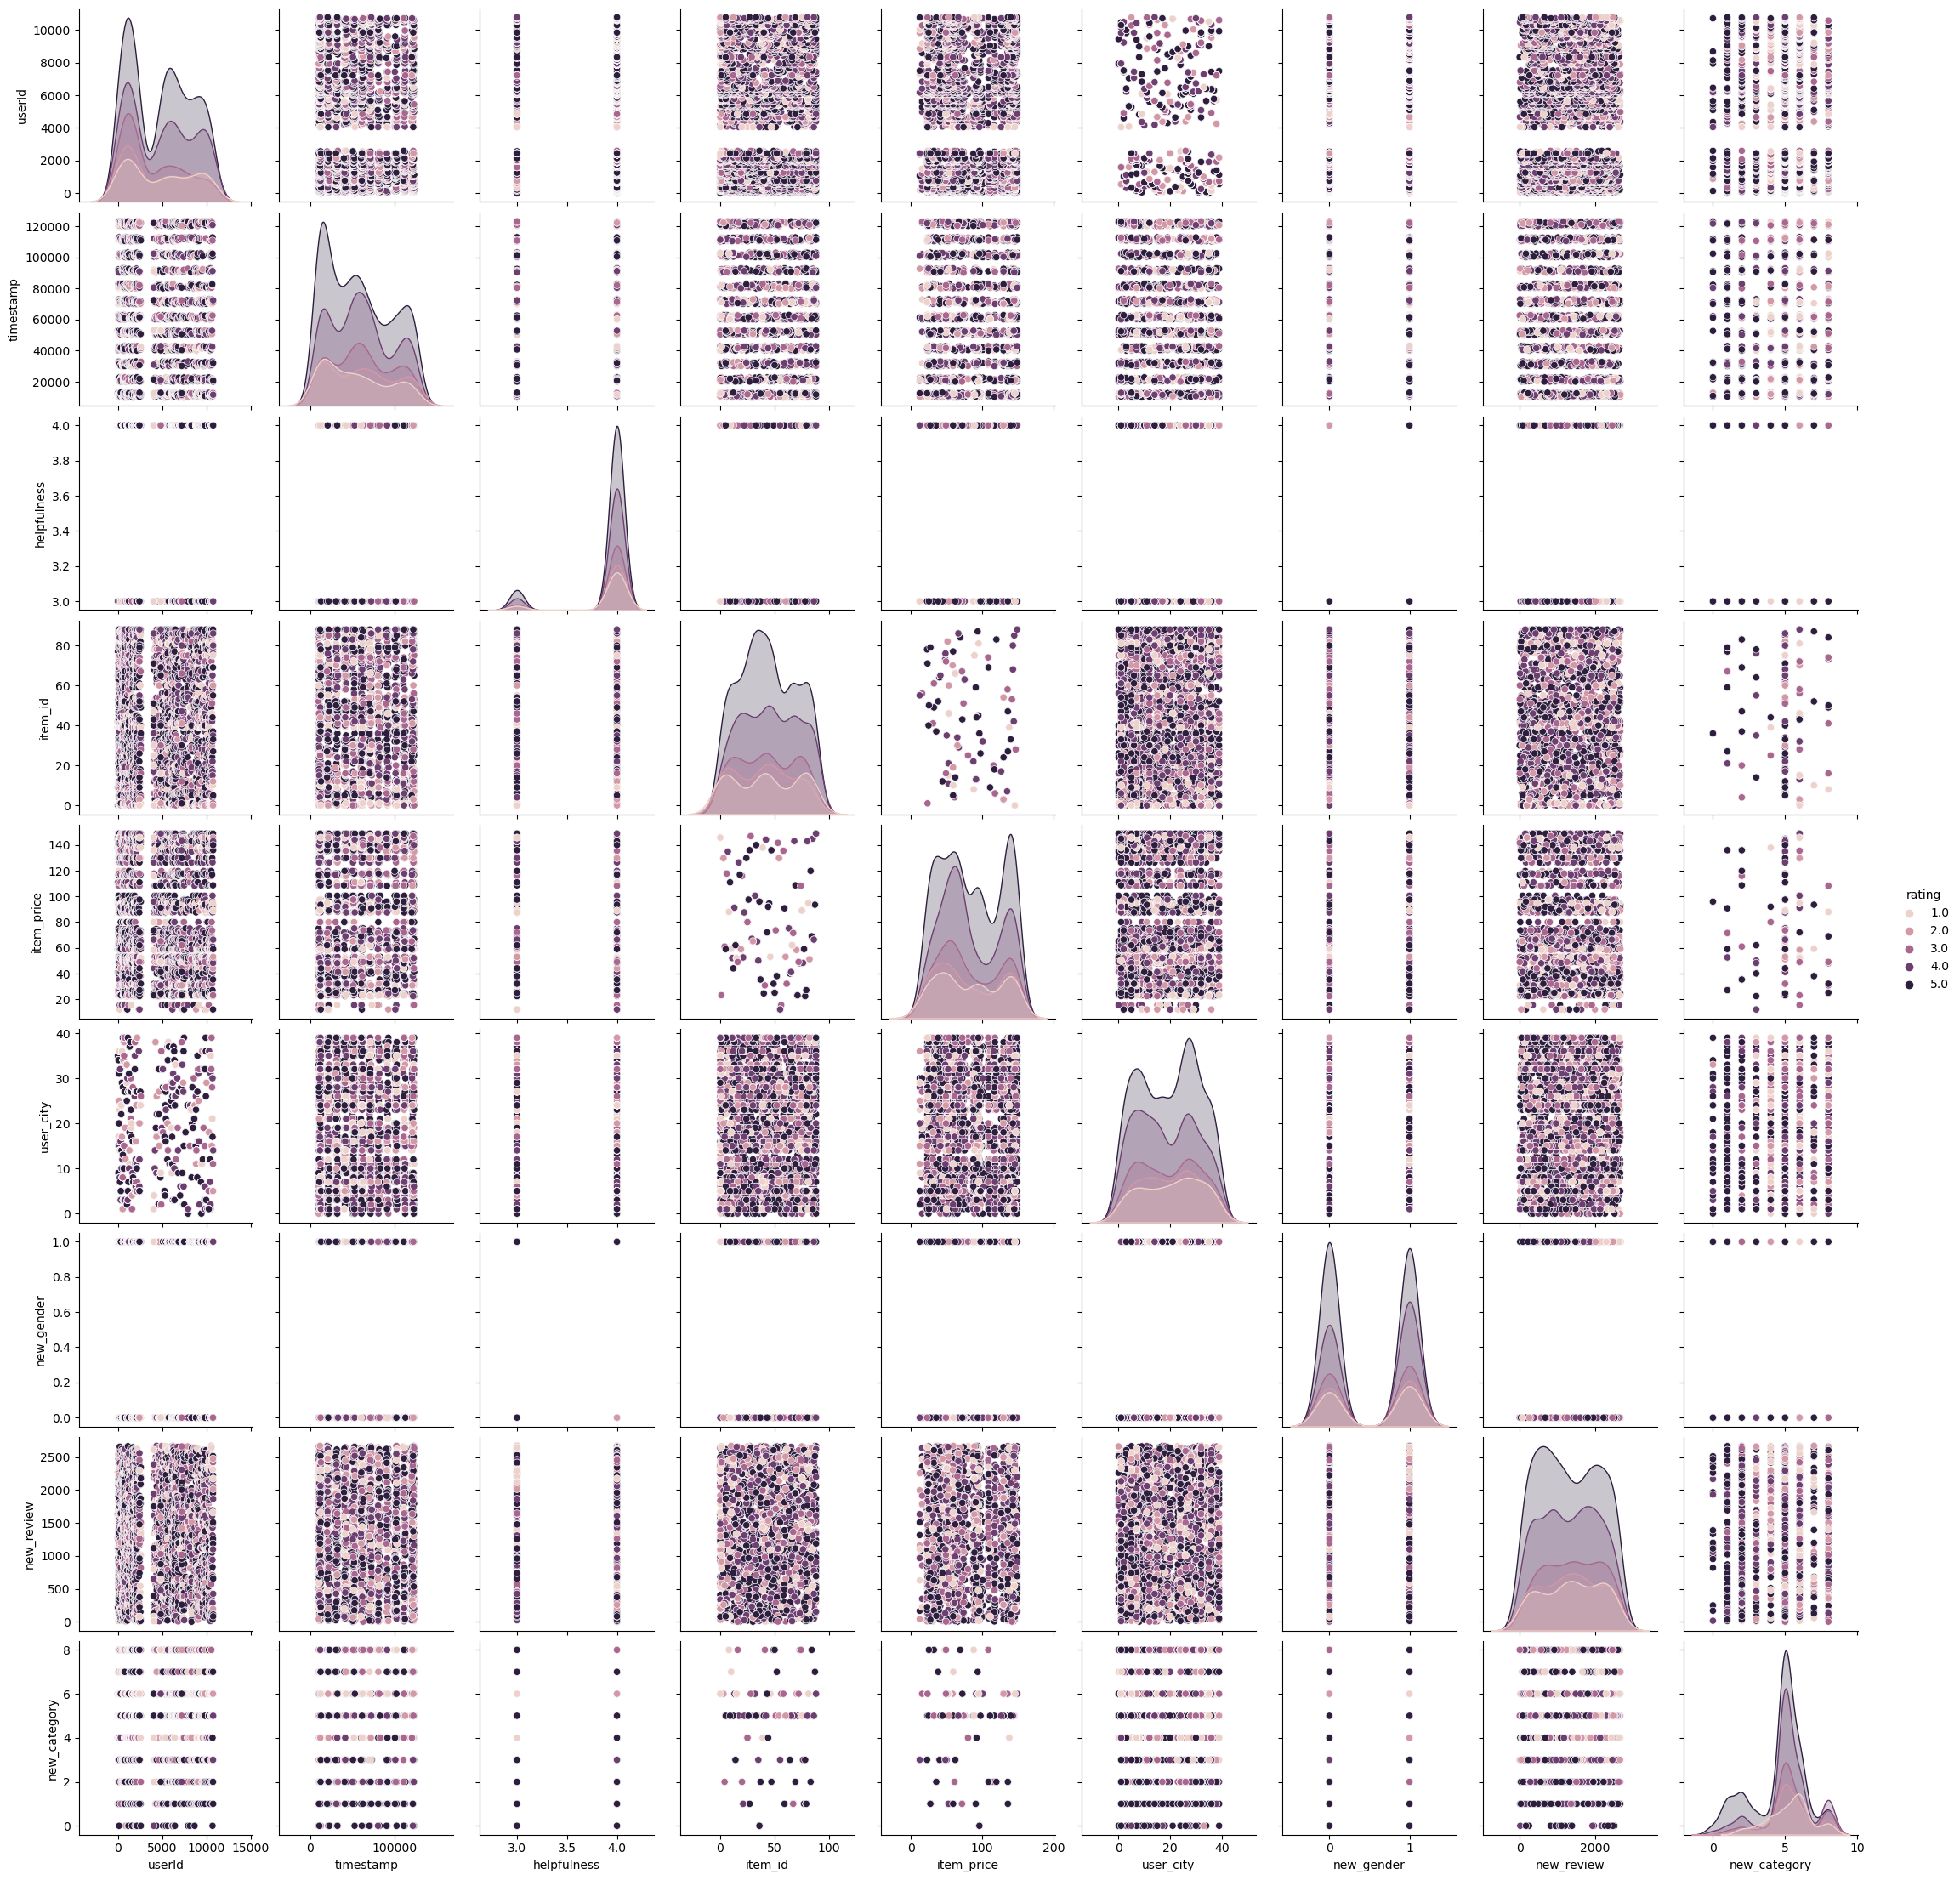

In [15]:
sns.pairplot(new_data, hue = 'rating')

In [16]:
new_data.corr(numeric_only=True)

,userId,timestamp,rating,helpfulness,item_id,item_price,user_city,new_gender,new_review,new_category
userId,1.000000,-0.069176,0.032506,-0.166136,-0.005549,0.024576,-0.030031,-0.058324,0.007139,-0.041362
timestamp,-0.069176,1.000000,0.000369,0.014179,-0.004452,0.010979,-0.014934,-0.003367,0.007029,0.015009
rating,0.032506,0.000369,1.000000,-0.007523,0.042890,0.027374,-0.028825,-0.034337,-0.036118,-0.163158
helpfulness,-0.166136,0.014179,-0.007523,1.000000,-0.019882,0.004112,0.012086,0.075947,-0.028259,-0.013408
item_id,-0.005549,-0.004452,0.042890,-0.019882,1.000000,-0.054450,-0.005576,0.002370,0.163544,-0.045268
item_price,0.024576,0.010979,0.027374,0.004112,-0.054450,1.000000,-0.023427,-0.040596,-0.041421,-0.115571
user_city,-0.030031,-0.014934,-0.028825,0.012086,-0.005576,-0.023427,1.000000,-0.065638,0.045626,0.008017
new_gender,-0.058324,-0.003367,-0.034337,0.075947,0.002370,-0.040596,-0.065638,1.000000,-0.037884,0.022549
new_review,0.007139,0.007029,-0.036118,-0.028259,0.163544,-0.041421,0.045626,-0.037884,1.000000,0.001970
new_category,-0.041362,0.015009,-0.163158,-0.013408,-0.045268,-0.115571,0.008017,0.022549,0.001970,1.000000


<Axes: >

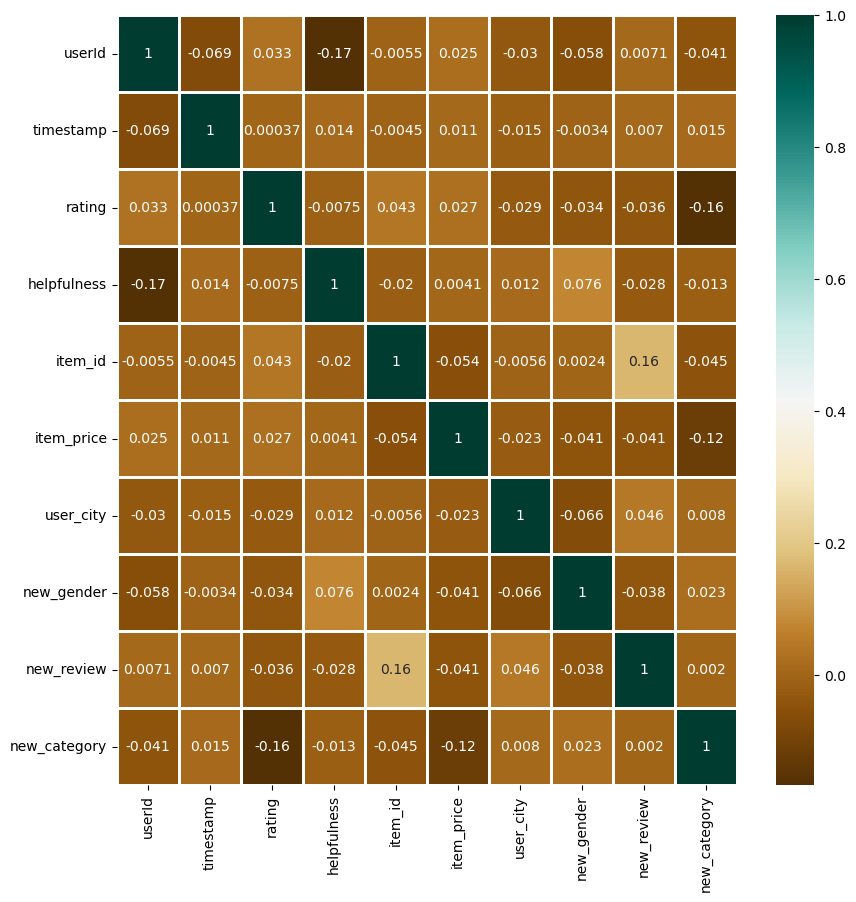

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(new_data.corr(numeric_only=True), annot=True, linewidth=1, cmap='BrBG')

### correlation matrix that shows the correlation between different variables.

#### The strength of the correlation is indicated by the value in the matrix. A value of 1 indicates a perfect positive correlation, while a value of -1 indicates a perfect negative correlation. Values closer to 0 indicate weaker correlations.
#### The sign of the correlation indicates whether the correlation is positive or negative. 
#### A positive correlation means that the two variables tend to move in the same direction. A negative correlation means that the two variables tend to move in opposite directions.


#### rating vs helpfulness: There is a weak negative correlation between rating and helpfulness (-0.0075). This means that there is a slight tendency for ratings to be lower when helpfulness is higher.

#### rating vs new_gender: There is a weak negative correlation between rating and new_gender (-0.0343). 


#### rating vs new_category: There is a weak negative correlation between rating and new_category, but however when comapred to other variables category is most correlated to rating (-0.163). 


#### rating vs new_review:  There is a weak negative correlation between rating and new_review,  but however when comapred to other variables new_review is more correlated to rating after category(-0.0361). 

#### Overall, the correlation matrix suggests that there may be some weak negative correlations between rating and several other variables

#### Because the correlations are negative, features like helpfulness_rating, new_review count, new_gender, and new_category might pull the model's predicted ratings downwards. Overall, The impact of these weak negative correlations is likely to be small or negligible compared to stronger positive correlations. 



### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [18]:
#Case 1: training data containing 10% of the entire data;
train, test = train_test_split(E_data, test_size=0.9, random_state=142)
print("The Shape of training set: ", train.shape)
print("The Shape of testing set: ",test.shape)

The Shape of training set:  (268, 14)
The Shape of testing set:  (2417, 14)


In [19]:
#Case 2: training data containing 90% of the entire data.
train, test = train_test_split(E_data, test_size=0.1, random_state=142)
print("The Shape of training set: ", train.shape)
print("The Shape of testing set: ",test.shape)

The Shape of training set:  (2416, 14)
The Shape of testing set:  (269, 14)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [20]:
#(model-a) using the training/testing data in case 1 with two most correlated input features
# Splitting dataset into test/train
train, test = train_test_split(E_data, test_size=0.9, random_state=142)
print(train.shape)
print(test.shape)

reg = linear_model.LinearRegression()
X_train_a = train[['new_category', 'new_review']]
y_train_a = train['rating']

X_test_a = test[['new_category', 'new_review']]
y_test_a = test['rating']

reg.fit(X_train_a, y_train_a)
print("y = x *", reg.coef_, "+", reg.intercept_)

predicted_a= reg.predict(X_test_a)
mse_a = ((np.array(y_test_a)-predicted_a)**2).sum()/len(y_test_a)
r2_a = r2_score(y_test_a, predicted_a)
print("MSE:", mse_a)
print("R Squared:", r2_a)

(268, 14)
(2417, 14)
y = x * [-1.72532718e-01 -4.50722610e-05] + 4.6008573986432815
MSE: 1.7690740179517055
R Squared: 0.020578145218415278


In [21]:
#(model-b) using the training/testing data in case 1 with two least correlated input features
# Splitting dataset into test/train
train, test = train_test_split(E_data, test_size=0.9, random_state=142)
print(train.shape)
print(test.shape)

reg = linear_model.LinearRegression()
X_train_b = train[['helpfulness', 'new_gender']]
y_train_b = train['rating']

X_test_b = test[['helpfulness', 'new_gender']]
y_test_b = test['rating']

reg.fit(X_train_b, y_train_b)
print("y = x *", reg.coef_, "+", reg.intercept_)

predicted_b = reg.predict(X_test_b)
mse_b = ((np.array(y_test_b)-predicted_b)**2).sum()/len(y_test_b)
r2_b = r2_score(y_test_b, predicted_b)
print("MSE:", mse_b)
print("R Squared:", r2_b)

(268, 14)
(2417, 14)
y = x * [-0.6009603  -0.00503848] + 6.013103665007783
MSE: 1.8412549895856636
R Squared: -0.019383789895821568


In [22]:
#(model-c) using the training/testing data in case 2 with two most correlated input features
# Splitting dataset into test/train
train, test = train_test_split(E_data, test_size=0.1, random_state=142)
print(train.shape)
print(test.shape)

reg = linear_model.LinearRegression()
X_train_c = train[['new_category', 'new_review']]
y_train_c = train['rating']

X_test_c = test[['new_category', 'new_review']]
y_test_c = test['rating']

reg.fit(X_train_c, y_train_c)
print("y = x *", reg.coef_, "+", reg.intercept_)

predicted_c = reg.predict(X_test_c)
mse_c = ((np.array(y_test_c)-predicted_c)**2).sum()/len(y_test_c)
r2_c = r2_score(y_test_c, predicted_c)
print("MSE:", mse_c)
print("R Squared:", r2_c)

(2416, 14)
(269, 14)
y = x * [-1.28748266e-01 -3.61948491e-05] + 4.393728400016022
MSE: 1.758897535980505
R Squared: 0.022040319944943154


In [23]:
#(model-d) using the training/testing data in case 2 with two least correlated input features
train, test = train_test_split(E_data, test_size=0.1, random_state=142)
print(train.shape)
print(test.shape)

reg = linear_model.LinearRegression()
X_train_d = train[['helpfulness', 'new_gender']]
y_train_d = train['rating']

X_test_d = test[['helpfulness', 'new_gender']]
y_test_d = test['rating']

reg.fit(X_train_d, y_train_d)
print("y = x *", reg.coef_, "+", reg.intercept_)

predicted_d = reg.predict(X_test_d)
mse_d = ((np.array(y_test_d)-predicted_d)**2).sum()/len(y_test_d)
r2_d = r2_score(y_test_d, predicted_d)
print("MSE:", mse_d)
print("R Squared:", r2_d)

(2416, 14)
(269, 14)
y = x * [ 0.01503934 -0.11365515] + 3.699700732834644
MSE: 1.8109460127732366
R Squared: -0.006899007486201203


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

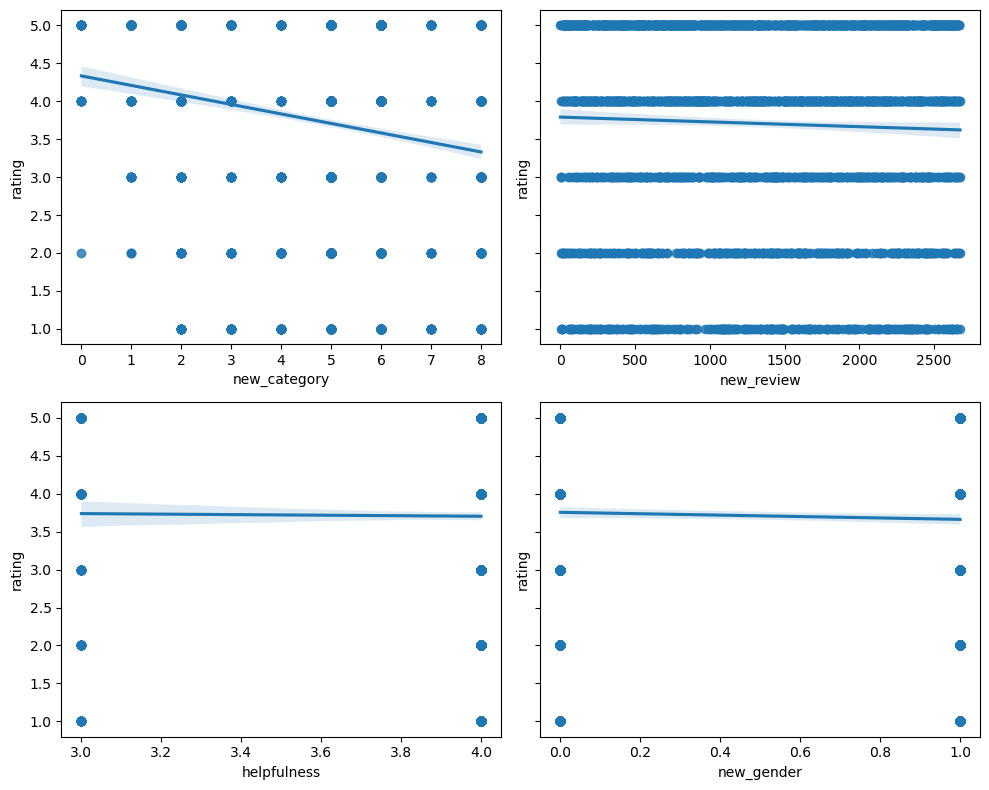

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(10, 8))
plot1 = sns.regplot(x='new_category', y='rating', data=E_data, ax=ax1)
plot2 = sns.regplot(x='new_review', y='rating', data=E_data,  ax=ax2)
plot3 = sns.regplot(x='helpfulness', y='rating', data=E_data, ax=ax3)
plot4 = sns.regplot(x='new_gender', y='rating', data=E_data, ax=ax4)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The number of new categories (new_category) and the ratings appear to have a linear relationship, according to the linear regression line. The expected rating tends to rise in parallel with the number of additional categories. The shaded area around the regression line represents the confidence interval. It displays the range of values, with a standard significance level of 95%, within which we are confident that the actual regression line falls. The wider the confidence interval, the less certain we are about the exact slope of the relationship.


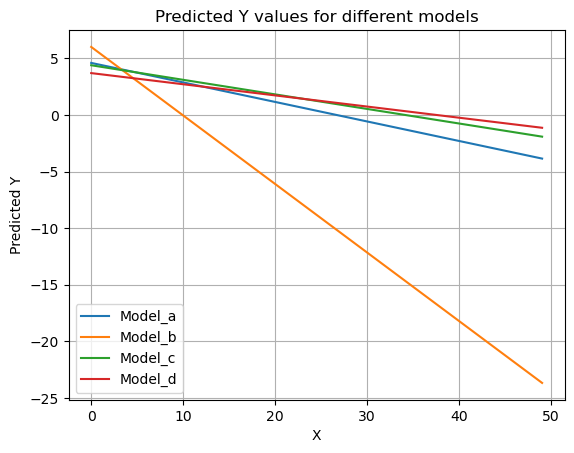

In [25]:
def model_a(X):
    return X * -1.72532718e-01 + X * -4.50722610e-05 + 4.6008573986432815

def model_b(X):
    return X * -0.6009603 + X * -0.00503848 + 6.013103665007783

def model_c(X):
    return X * -1.28748266e-01 + X * -3.61948491e-05 + 4.393728400016022

def model_d(X):
    return X * 0.01503934 + X * -0.11365515 + 3.699700732834644

# SAMPLE FOR THE PLOT
X = range(50)

# calculate predicted y values for models
y_a = [model_a(n) for n in X]
y_b = [model_b(n) for n in X]
y_c = [model_c(n) for n in X]
y_d = [model_d(n) for n in X]

# plots
plt.plot(X, y_a, label='Model_a')
plt.plot(X, y_b, label='Model_b')
plt.plot(X, y_c, label='Model_c')
plt.plot(X, y_d, label='Model_d')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Predicted Y')
plt.title('Predicted Y values for different models')
plt.legend()
plt.grid(True)
plt.show()


graph of predicted y values for four different models (Model_a, Model_b, Model_c, and Model_d). The x-axis represents the input value (X), and the y-axis represents the predicted y value.
All four models predict a decreasing relationship between the input value (X) and the predicted y value. As the X value increases, the predicted y value decreases.
Model_a and Model_c: These two models have very similar prediction curves. Their lines are almost indistinguishable across the entire range of X values.
Model_b: This model's curve is steeper than Model_a and Model_c. It predicts a more significant decrease in y value for increasing X values.
Model_d: This model's curve is the flattest among the four. It predicts a very slight decrease in y value even as X increases.

According to my understanding, Model C performs better than the other three models in terms of prediction accuracy, as seen by its lower MSE (1.7589) based only on the MSE values. All of the models, however, do not have a particularly high R2 value when looking at R-squared values, indicating that they would not be able to account for much of the variance in the dependent variable.

In summary, none of the models appear to be particularly good at describing the variance in the dependent variable, even though Model C has the lowest MSE and marginally higher R2 than the other models.
Therefore, further analysis or improvement of the models may be necessary.

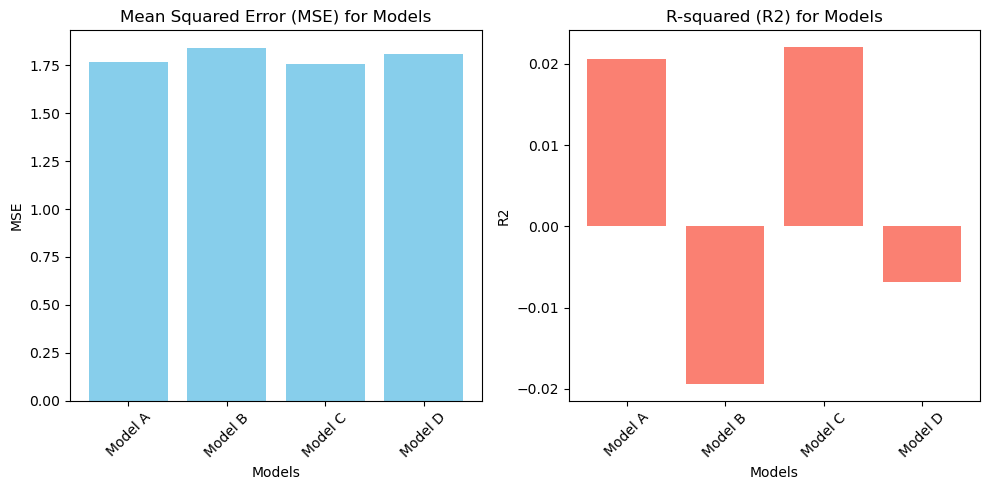

In [26]:
# Models and their corresponding MSE and R2 values
models = ['Model A', 'Model B', 'Model C', 'Model D']
mse_values = [1.7690740179517055, 1.8412549895856636, 1.758897535980505, 1.8109460127732366]
r2_values = [0.020578145218415278, -0.019383789895821568, 0.022040319944943154, -0.006899007486201203]

# Plotting MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE) for Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Plotting R2
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='salmon')
plt.title('R-squared (R2) for Models')
plt.xlabel('Models')
plt.ylabel('R2')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

 Smaller MSE is better. 
 R squared close to 1 is better. Model C is better from the above graph.
 It's possible that using a different model or including additional features could improve the model's accuracy.
 Impact of training and testing size doesn't have much effect in this case.

### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


The above table shows the number of medals won by different countries at the 2008 Summer Olympics. 
One table is arranged by total medals won, while the other is arranged by number of gold medals won.
Table 2 sorts the countries based on how many Gold medals each has won, but ignores Silver and Bronze medals.   
Overall, the infographic is disingenuous even though the content is accurate. 
The Olympics are about more than just winning medals. Many competitors in the Olympics fail to bring home any medals. These athletes might still have set personal records or participated in elite competitions. Certain nations might be more proficient in Olympic sports, whereas other nations might be more proficient in sports that are not. More medals will likely be won by larger, more resource-rich nations than by smaller, less resource-rich nations. It would be unjust and deceptive if someone used this data to rank nations according to how well they performed at the Olympics.